# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [129]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [130]:
noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

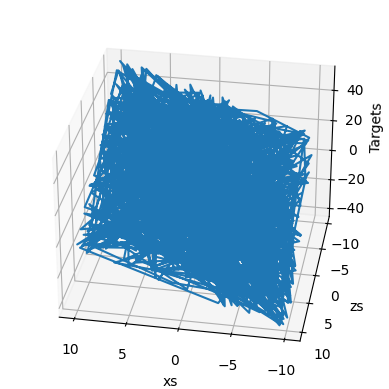

In [131]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs.reshape(observations,), zs.reshape(observations,), targets.reshape(observations,))

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

plt.show()

targets = targets.reshape(observations,1)

### Initialize variables

In [132]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[ 0.08367372]
 [-0.09061427]]
[-0.08359462]


### Set a learning rate

In [133]:
learning_rate = 0.02

### Train the model

In [134]:
for i in range (100):
    outputs = np.dot(inputs,weights) + biases

    deltas = outputs - targets

    loss = np.sum(deltas ** 2) / 2 / observations

    print (loss)

    deltas_scaled = deltas / observations

    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

226.96616037364484
32.17138528358915
14.059633746812288
11.905917583724605
11.278580744153416
10.820997390224965
10.397175083633325
9.991943028531383
9.602973848401998
9.229428574235849
8.870671537889752
8.526114069772182
8.195193711071518
7.877370662407201
7.572126544119734
7.278963500950093
6.997403383050756
6.7269869651368985
6.46727319734936
6.217838485881435
5.978276002093503
5.748195018974096
5.52722027386311
5.314991356397449
5.111162120680843
4.91540012071899
4.727386068199326
4.54681331173099
4.373387336695622
4.206825284893291
4.046855493200074
3.8932170504847936
3.7456593720623275
3.6039417909893574
3.467833165535974
3.337111502192947
3.211563593599742
3.0909846708027926
2.9751780692768213
2.863954908164496
2.7571337822112993
2.6545404658930774
2.556007629253796
2.461374564989949
2.3704869263365516
2.2831964753271743
2.1993608410174508
2.1188432872777083
2.0415124897760077
1.9672423217878103
1.89591164848299
1.8274041293546173
1.761608028467297
1.6984160322155821
1.637725074

### Print weights and biases and see if we have worked correctly.

In [135]:
print (weights, biases, loss)

[[ 2.00293589]
 [-3.00640344]] [4.35293524] 0.40426394232069707


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

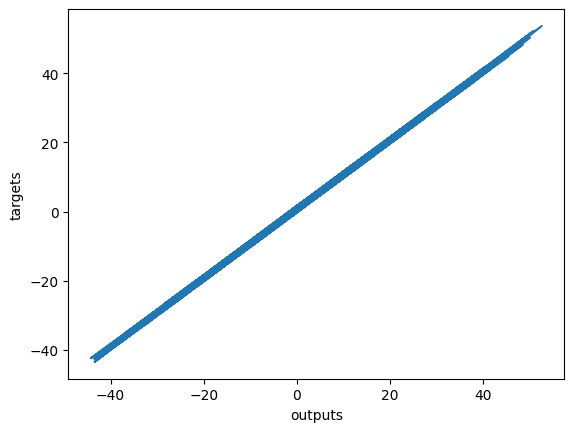

In [136]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()